In [2]:
# IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

# **CONFIG BLOCK**

In [3]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15


# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING (Optimizer: RMSProp)**


In [4]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# BUILD VGG16 FROM SCRATCH 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# COMPILE 
optimizer = RMSprop(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763360029.535262      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1763360034.166817     126 service.cc:148] XLA service 0x7cc6440081f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763360034.167582     126 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763360034.718438     126 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763360054.782672     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.3605 - loss: 1.0984

77/77 ━━━━━━━━━━━━━━━━━━━━ 63s 518ms/step - accuracy: 0.3609 - loss: 1.0985 - val_accuracy: 0.3596 - val_loss: 1.0732
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.5290 - loss: 0.9211

77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 334ms/step - accuracy: 0.5301 - loss: 0.9200 - val_accuracy: 0.5955 - val_loss: 0.8468
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7375 - loss: 0.6419

77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 331ms/step - accuracy: 0.7376 - loss: 0.6417 - val_accuracy: 0.8026 - val_loss: 0.4864
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7664 - loss: 0.5632

77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 324ms/step - accuracy: 0.7666 - loss: 0.5628 - val_accuracy: 0.8101 - val_loss: 0.5926
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8112 - loss: 0.4700

77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 332ms/step - accuracy: 0.8112 - loss: 0.4701 - val_accuracy: 0.8498 - val_loss: 0.3607
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8321 - loss: 0.4156

77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 333ms/step - accuracy: 0.8322 - loss: 0.4156 - val_accuracy: 0.8723 - val_loss: 0.3214
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8461 - loss: 0.3757

77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 332ms/step - accuracy: 0.8462 - loss: 0.3756 - val_accuracy: 0.8746 - val_loss: 0.3025
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 277ms/step - accuracy: 0.8668 - loss: 0.3574 - val_accuracy: 0.8596 - val_loss: 0.3743
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8624 - loss: 0.3454

77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 332ms/step - accuracy: 0.8624 - loss: 0.3452 - val_accuracy: 0.8970 - val_loss: 0.2511
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.8810 - loss: 0.3292 - val_accuracy: 0.8895 - val_loss: 0.2777
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.8854 - loss: 0.3008

77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 334ms/step - accuracy: 0.8853 - loss: 0.3008 - val_accuracy: 0.9125 - val_loss: 0.2176
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8950 - loss: 0.2737

77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 324ms/step - accuracy: 0.8950 - loss: 0.2738 - val_accuracy: 0.9137 - val_loss: 0.2188
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 277ms/step - accuracy: 0.9136 - loss: 0.2403 - val_accuracy: 0.8855 - val_loss: 0.2596
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8920 - loss: 0.2704

77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 322ms/step - accuracy: 0.8920 - loss: 0.2705 - val_accuracy: 0.9143 - val_loss: 0.2250


# **EVALUATION AND METRICS**

55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.8633 - loss: 0.3082

 Test Accuracy: 89.81%
 Test Loss: 0.2612
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.8693    0.8523    0.8607       562
         Normal     0.8702    0.8688    0.8695       625
Viral Pneumonia     0.9573    0.9782    0.9676       550

       accuracy                         0.8981      1737
      macro avg     0.8989    0.8998    0.8993      1737
   weighted avg     0.8975    0.8981    0.8977      1737



<Figure size 800x600 with 0 Axes>

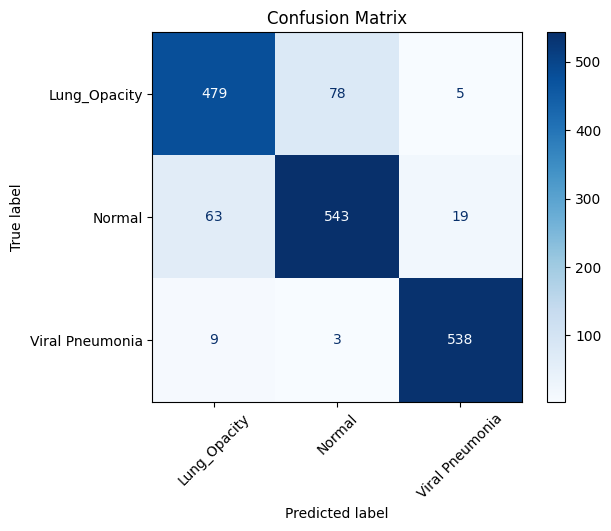

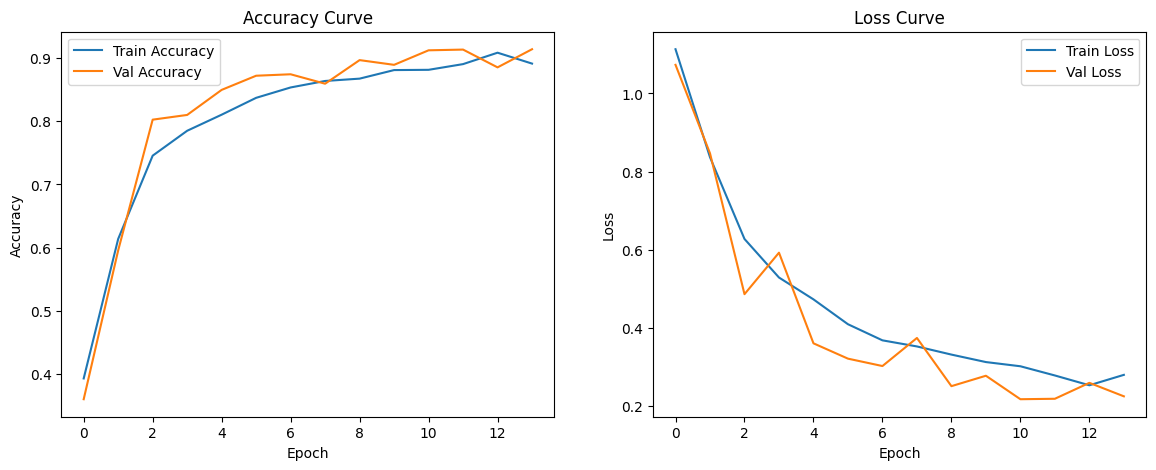

In [5]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **CONFIG BLOCK**

In [8]:
from tensorflow.keras.optimizers import SGD

DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING (Optimizer: SGD with Momentum=0.9)**


In [9]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# BUILD VGG16 FROM SCRATCH 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# COMPILE 
optimizer = SGD(learning_rate=LEARNING_RATE, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.3618 - loss: 1.0985

77/77 ━━━━━━━━━━━━━━━━━━━━ 34s 387ms/step - accuracy: 0.3617 - loss: 1.0985 - val_accuracy: 0.3596 - val_loss: 1.0982
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.3496 - loss: 1.0982 - val_accuracy: 0.3596 - val_loss: 1.0979
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.3525 - loss: 1.0981 - val_accuracy: 0.3596 - val_loss: 1.0977
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.3515 - loss: 1.0979 - val_accuracy: 0.3596 - val_loss: 1.0975
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.3678 - loss: 1.0973 - val_accuracy: 0.3596 - val_loss: 1.0973
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.3768 - loss: 1.0968 - val_accuracy: 0.3596 - val_loss: 1.0972
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.3576 - loss: 1.0973 - val_accuracy: 0.3596 - val_loss: 1.0970
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.3515 - loss: 1.0975 - val_accuracy: 0.359

# **EVALUATION AND METRICS**


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.2614 - loss: 1.1017

 Test Accuracy: 35.98%
 Test Loss: 1.0956
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.0000    0.0000    0.0000       562
         Normal     0.3598    1.0000    0.5292       625
Viral Pneumonia     0.0000    0.0000    0.0000       550

       accuracy                         0.3598      1737
      macro avg     0.1199    0.3333    0.1764      1737
   weighted avg     0.1295    0.3598    0.1904      1737



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 800x600 with 0 Axes>

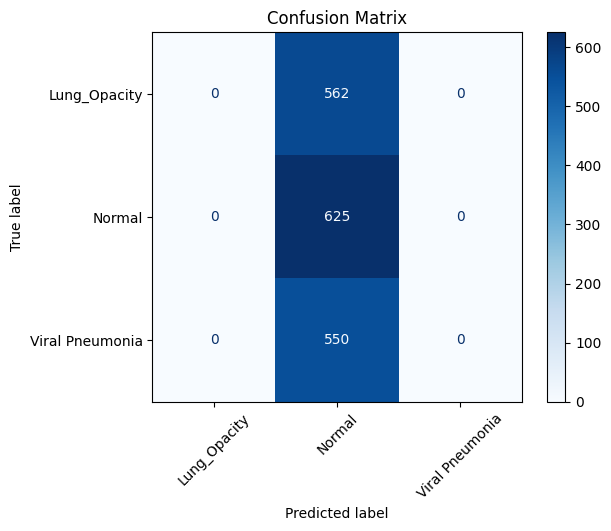

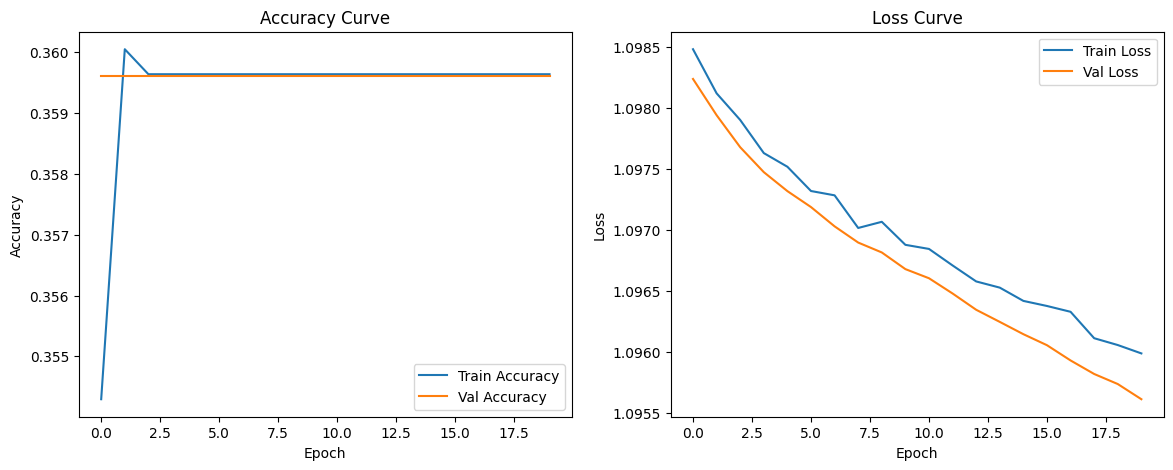

In [10]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
